## One-Side Limit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

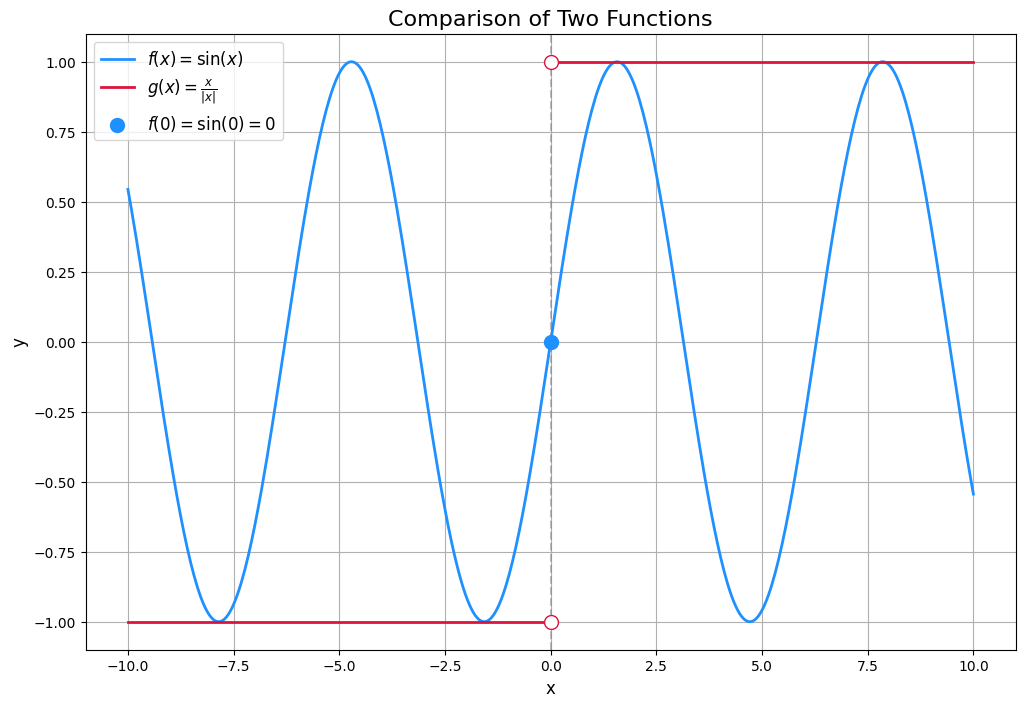

In [3]:
# 1. Define the functions
def f1(x):
    """Function 1: A continuous sine wave"""
    return np.sin(x)

def f2(x):
    """Function 2: A discontinuous step function"""
    # Using np.sign for a more robust and direct implementation of x/|x|
    # np.sign(0) returns 0, so we still need to handle the discontinuity by plotting segments.
    return np.sign(x)

# 2. Set up the x-values for plotting
# For the sine wave, we can use a single continuous range
x_f1 = np.linspace(-10, 10, 500) # Increased points for smoother sine wave

# For the step function, we need to handle the discontinuity at x=0
# We create two separate ranges to avoid calculating at x=0
x_f2_neg = np.linspace(-10, -0.001, 200) # Go very close to 0
x_f2_pos = np.linspace(0.001, 10, 200)   # Start very close to 0

# 3. Calculate the y-values
y_f1 = f1(x_f1)
y_f2_neg = f2(x_f2_neg)
y_f2_pos = f2(x_f2_pos)

# 4. Create the plot
plt.figure(figsize=(12, 8))

# Plot the continuous sine function
plt.plot(x_f1, y_f1, color='dodgerblue', linewidth=2, label=r'$f(x) = \sin(x)$')

# Plot the discontinuous step function
plt.plot(x_f2_neg, y_f2_neg, color='crimson', linewidth=2, label=r'$g(x) = \frac{x}{|x|}$')
plt.plot(x_f2_pos, y_f2_pos, color='crimson', linewidth=2)

# Add open circles to show the discontinuity of the step function at x=0
# These indicate the function approaches these values but is not defined at x=0
plt.scatter(0, 1, color='crimson', s=100, facecolors='white', zorder=5, edgecolors='crimson')
plt.scatter(0, -1, color='crimson', s=100, facecolors='white', zorder=5, edgecolors='crimson')

# Add a closed circle to explicitly show the continuity of the sine function at x=0
# f1(0) = sin(0) = 0. This point is part of the continuous function.
plt.scatter(0, 0, color='dodgerblue', s=100, zorder=5, label=r'$f(0) = \sin(0) = 0$')


# Add a vertical dashed line to highlight x=0
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Set plot title, labels, and legend
plt.title('Comparison of Two Functions', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [4]:
def f(x):
    return np.sin(x)
    
x_left = np.array([-0.1, -0.01, -0.001, -0.0001])
x_right = np.array([0.1, 0.01, 0.001, 0.0001])

data_f = {
    "x (→ 0⁻)": x_left,
    "f(x) (Left)": f(x_left),
    "x (→ 0⁺)": x_right,
    "f(x) (Right)": f(x_right)
}
df_f = pd.DataFrame(data_f)
df_f

,x (→ 0⁻),f(x) (Left),x (→ 0⁺),f(x) (Right)
0,-0.1000,-0.099833,0.1000,0.099833
1,-0.0100,-0.010000,0.0100,0.010000
2,-0.0010,-0.001000,0.0010,0.001000
3,-0.0001,-0.000100,0.0001,0.000100


In [5]:
def g(x):
    return x / np.abs(x)
    
x_left = np.array([-0.1, -0.01, -0.001, -0.0001])
x_right = np.array([0.1, 0.01, 0.001, 0.0001])

data_g = {
    "x (→ 0⁻)": x_left,
    "g(x) (Left)": g(x_left),
    "x (→ 0⁺)": x_right,
    "g(x) (Right)": g(x_right)
}
df_g = pd.DataFrame(data_g)
df_g

,x (→ 0⁻),g(x) (Left),x (→ 0⁺),g(x) (Right)
0,-0.1000,-1.0,0.1000,1.0
1,-0.0100,-1.0,0.0100,1.0
2,-0.0010,-1.0,0.0010,1.0
3,-0.0001,-1.0,0.0001,1.0


### Conditions for the Existence of a Limit

For the limit of a function \( f(x) \) to exist as \( x \) approaches a number \( c \), the following three conditions must be satisfied:
We say the limit exists and equals \( L \) if and only if:
$$
\lim_{x \to c} f(x) = L 
\quad \Longleftrightarrow \quad 
\lim_{x \to c^-} f(x) = L 
\quad \text{and} \quad 
\lim_{x \to c^+} f(x) = L
$$


### **Right-Hand Limit**

Imagine you're walking along the graph of a function $f(x)$, moving toward a specific x-value $c$ **from the right side** (i.e., where $ x > c $).

We say the **right-hand limit** of $f(x)$ as $x \to c^+$ is $L$ if, no matter how closely someone challenges you to get to the y-value $ L$ (within a tiny distance $\epsilon$), you can always respond by choosing a small distance $\delta$, such that:

> Whenever $x$ is **within $\delta$ units to the right of $c$**, the function values $f(x)$ stay within $\epsilon$ units of $L$.

Formally, this means:

$$\lim_{x \to c^+} f(x) = L \quad \text{if and only if} \quad \forall \epsilon > 0, \, \exists \delta > 0 \text{ such that } 0 < x - c < \delta \Rightarrow |f(x) - L| < \epsilon$$

---

### **Left-Hand Limit**

Imagine you're walking along the graph of a function $f(x)$, moving toward a specific x-value $c$ **from the left side** (i.e., where $x < c$).

We say the **left-hand limit** of $f(x)$ as $x \to c^-$ is $L$ if, no matter how closely someone challenges you to get to the y-value $L$ (within a tiny distance $\epsilon$), you can always respond by choosing a small distance $\delta$, such that:

> Whenever $x$ is **within $\delta$ units to the left of $c$**, the function values $f(x)$ stay within $\epsilon$ units of $L$.

Formally, this means:

$$\lim_{x \to c^-} f(x) = L \quad \text{if and only if} \quad \forall \epsilon > 0, \, \exists \delta > 0 \text{ such that } 0 < c - x < \delta \Rightarrow |f(x) - L| < \epsilon$$